In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
tickers = 'AAPL'
start_date = '2020-01-01'
end_date = '2024-01-01'

In [3]:
data = yf.download(tickers,start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,75.087502,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,74.357498,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,74.949997,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,74.597504,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,75.797501,132079200


<Axes: title={'center': 'AAPL Close Trade'}, xlabel='Date'>

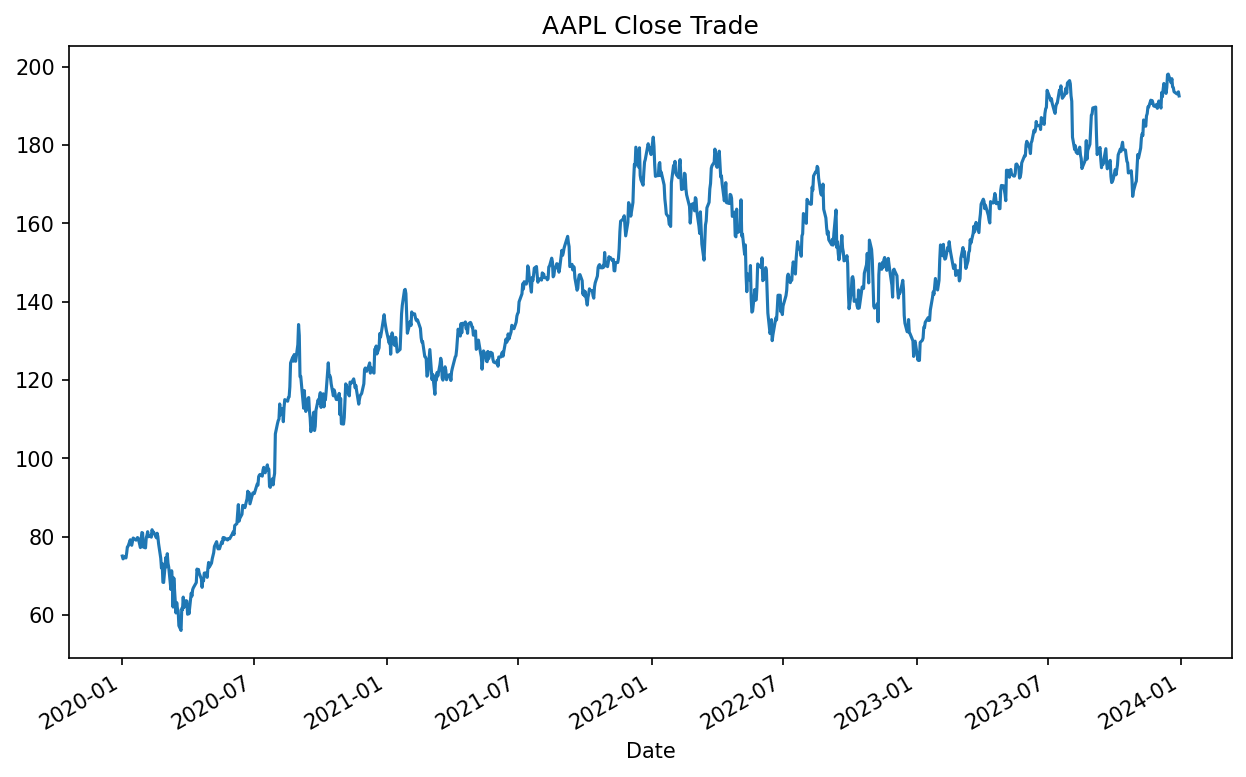

In [6]:
plt.figure(figsize=(10,6),dpi=150)
data['Close'].plot(title='AAPL Close Trade')

In [7]:
short_window = 50
long_window = 200

In [8]:
data['Short MA'] = data['Close'].rolling(window=short_window,min_periods=1,center=False).mean()
data['Long MA'] = data['Close'].rolling(window=long_window,min_periods=1,center=False).mean()

In [9]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Short MA,Long MA
Date,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,75.087502,135480400,75.087502,75.087502
2020-01-03,74.287498,75.144997,74.125000,74.357498,74.357498,146322800,74.722500,74.722500
2020-01-06,73.447502,74.989998,73.187500,74.949997,74.949997,118387200,74.798332,74.798332
2020-01-07,74.959999,75.224998,74.370003,74.597504,74.597504,108872000,74.748125,74.748125
2020-01-08,74.290001,76.110001,74.290001,75.797501,75.797501,132079200,74.958000,74.958000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1006 non-null   float64
 1   High       1006 non-null   float64
 2   Low        1006 non-null   float64
 3   Close      1006 non-null   float64
 4   Adj Close  1006 non-null   float64
 5   Volume     1006 non-null   int64  
 6   Short MA   1006 non-null   float64
 7   Long MA    1006 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 70.7 KB


In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1006.0,1.406755e+02,3.331002e+01,5.702000e+01,1.236825e+02,1.455400e+02,1.663025e+02,1.980200e+02
High,1006.0,1.423214e+02,3.343057e+01,5.712500e+01,1.250300e+02,1.472650e+02,1.681475e+02,1.996200e+02
Low,1006.0,1.391435e+02,3.317920e+01,5.315250e+01,1.221575e+02,1.441200e+02,1.648150e+02,1.970000e+02
Close,1006.0,1.408081e+02,3.331386e+01,5.609250e+01,1.235925e+02,1.458600e+02,1.662150e+02,1.981100e+02
Adj Close,1006.0,1.408081e+02,3.331386e+01,5.609250e+01,1.235925e+02,1.458600e+02,1.662150e+02,1.981100e+02
Volume,1006.0,9.895211e+07,5.439653e+07,2.404830e+07,6.407675e+07,8.467540e+07,1.155069e+08,4.265100e+08
Short MA,1006.0,1.380221e+02,3.296419e+01,6.750640e+01,1.208043e+02,1.452791e+02,1.627921e+02,1.874426e+02
Long MA,1006.0,1.301940e+02,3.248838e+01,7.214774e+01,1.003076e+02,1.435349e+02,1.572204e+02,1.794879e+02


In [12]:
data['Signal'] = 0.0

In [13]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Short MA,Long MA,Signal
Date,,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,75.087502,135480400,75.087502,75.087502,0.0
2020-01-03,74.287498,75.144997,74.125000,74.357498,74.357498,146322800,74.722500,74.722500,0.0
2020-01-06,73.447502,74.989998,73.187500,74.949997,74.949997,118387200,74.798332,74.798332,0.0
2020-01-07,74.959999,75.224998,74.370003,74.597504,74.597504,108872000,74.748125,74.748125,0.0
2020-01-08,74.290001,76.110001,74.290001,75.797501,75.797501,132079200,74.958000,74.958000,0.0


In [14]:
data['Signal'][short_window:] = np.where(data['Short MA'][short_window:] > data['Long MA'][short_window:],1.0,0.0)

C:\Users\HP\AppData\Local\Temp\ipykernel_10584\3025552337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][short_window:] = np.where(data['Short MA'][short_window:] > data['Long MA'][short_window:],1.0,0.0)


In [27]:
#sns.countplot(data['Signal'])
data['Signal'].value_counts()

Signal
1.0    702
0.0    304
Name: count, dtype: int64

In [28]:
data['Position'] = data['Signal'].diff()

In [31]:
data['Position'].value_counts()

Position
 0.0    998
 1.0      4
-1.0      3
Name: count, dtype: int64

In [32]:
initial_captial = 10000.00
shares = 10
data['Portfolio Value'] = initial_captial + (data['Close'].diff() * data['Position'].shift() * shares).cumsum()

In [33]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Short MA,Long MA,Signal,Position,Portfolio Value
Date,,,,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,75.087502,135480400,75.087502,75.087502,0.0,NaN,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,74.357498,146322800,74.722500,74.722500,0.0,0.0,NaN
2020-01-06,73.447502,74.989998,73.187500,74.949997,74.949997,118387200,74.798332,74.798332,0.0,0.0,10000.0
2020-01-07,74.959999,75.224998,74.370003,74.597504,74.597504,108872000,74.748125,74.748125,0.0,0.0,10000.0
2020-01-08,74.290001,76.110001,74.290001,75.797501,75.797501,132079200,74.958000,74.958000,0.0,0.0,10000.0


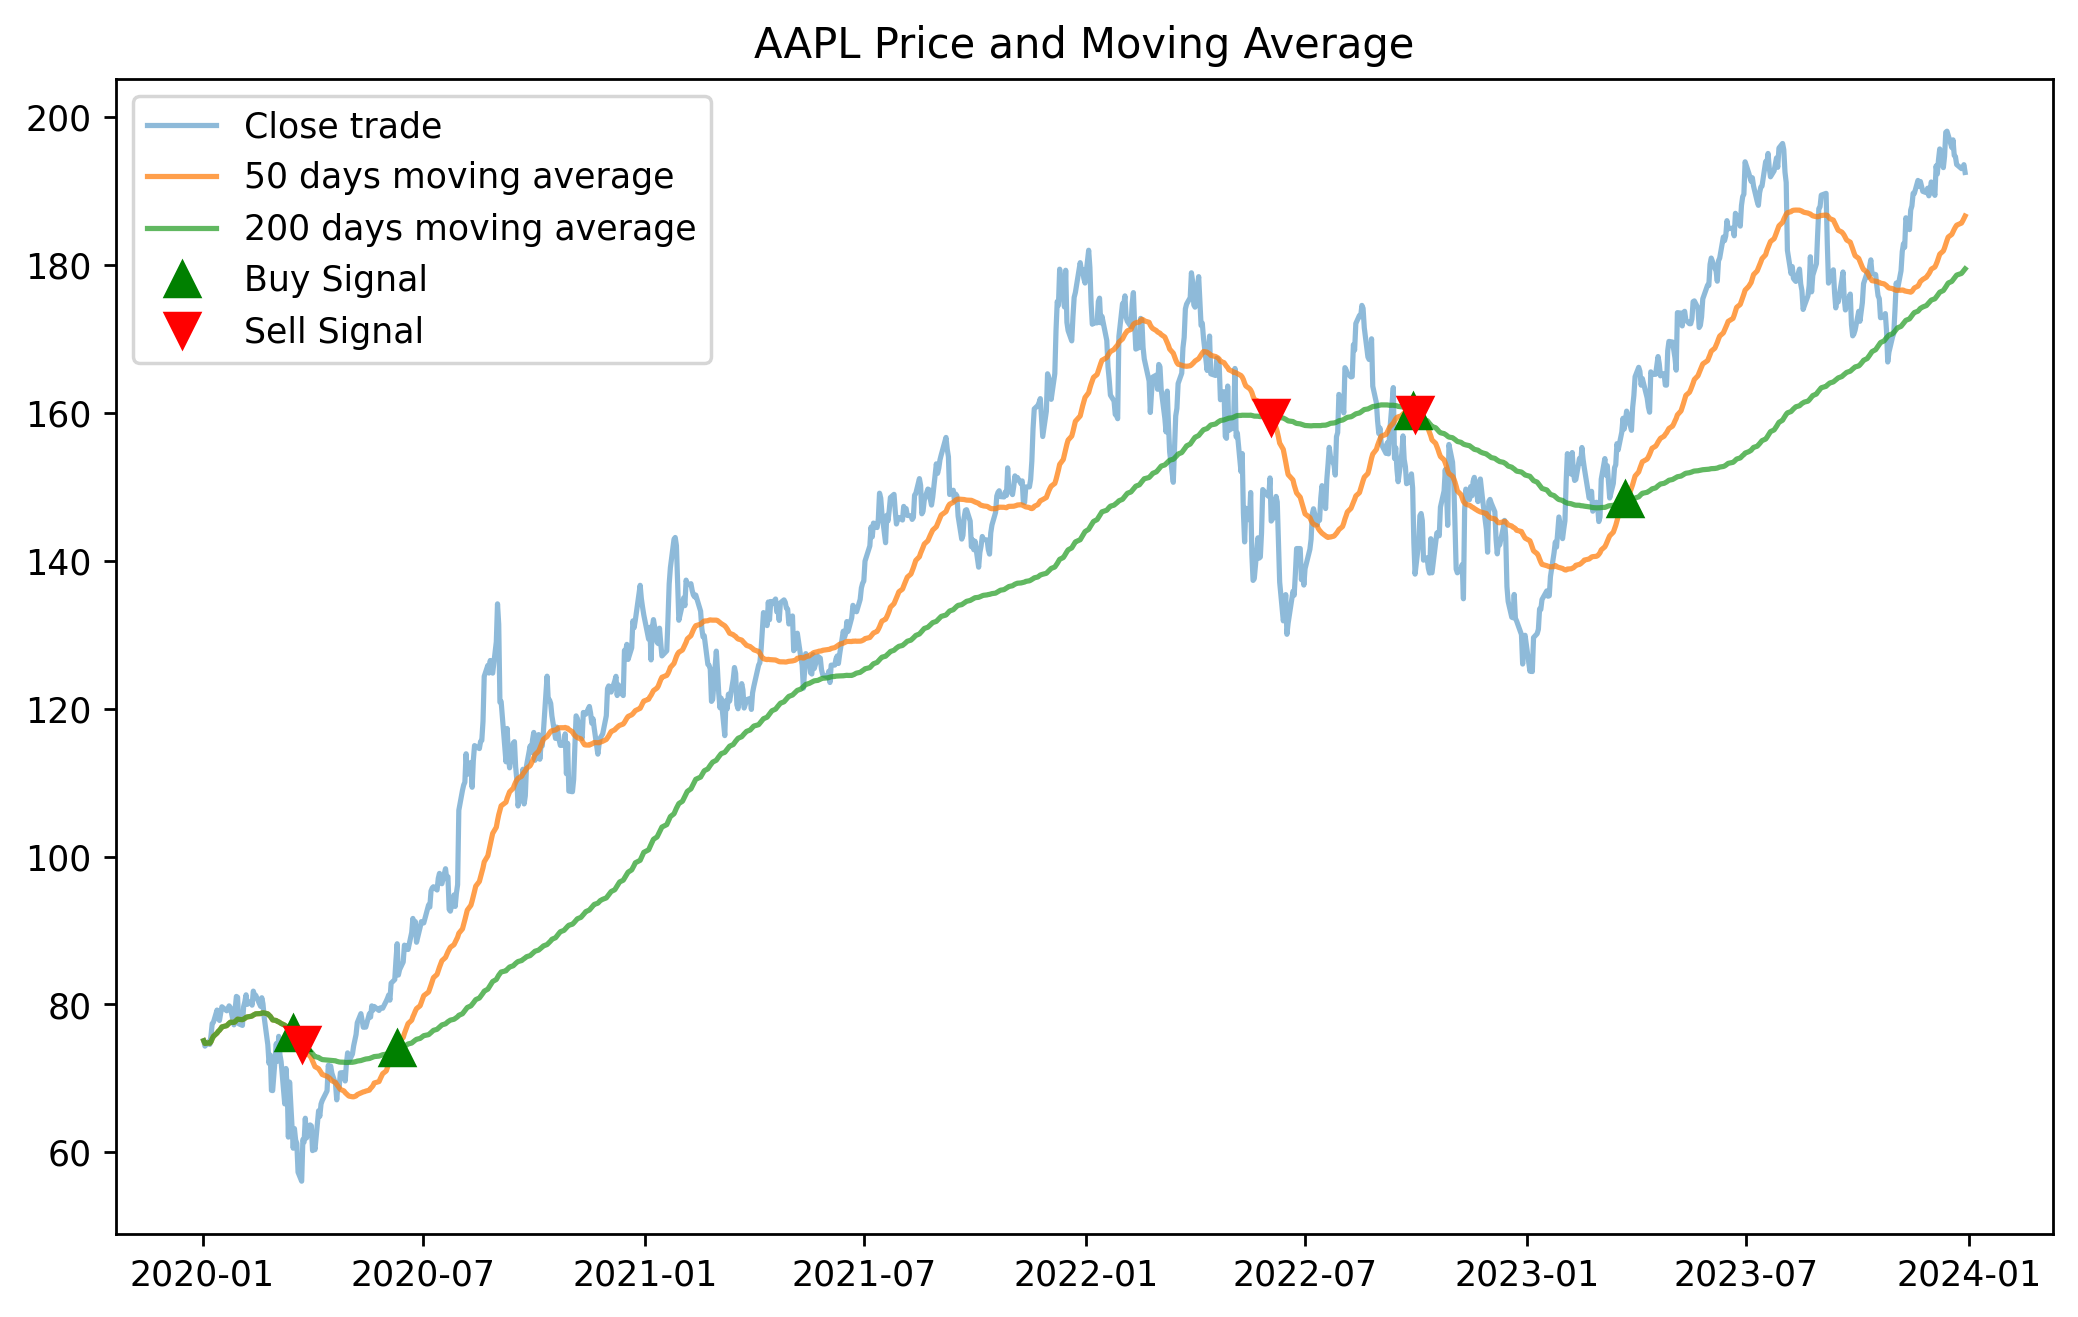

In [41]:
plt.figure(figsize=(10,6) ,dpi=250)
plt.plot(data['Close'],label = 'Close trade' ,alpha=0.5)
plt.plot(data['Short MA'],label = '50 days moving average',alpha=0.75)
plt.plot(data['Long MA'],label = '200 days moving average' , alpha=0.75)
plt.plot(data[data['Position']==1.0].index,data['Short MA'][data['Position']==1.0],'^',markersize=10,color='g',lw=0,label='Buy Signal')
plt.plot(data[data['Position']==-1.0].index,data['Long MA'][data['Position']==-1.0],'v',markersize=10,color='r',lw=0,label='Sell Signal')
plt.title('AAPL Price and Moving Average')
plt.legend()

Text(0.5, 1.0, 'Portfolio Value over all')

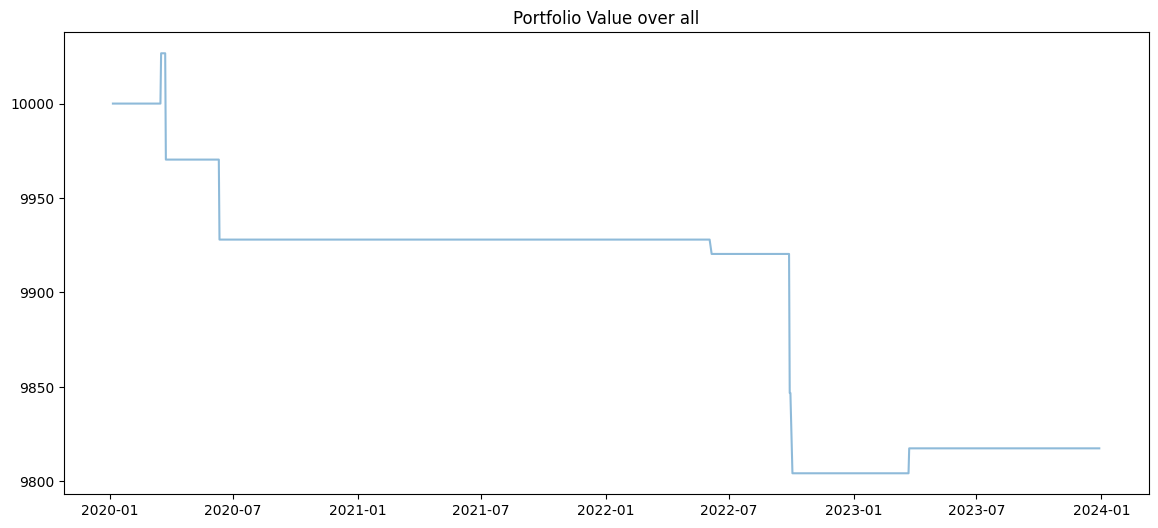

In [45]:
plt.figure(figsize=(14,6),dpi=100)
plt.plot(data['Portfolio Value'],alpha=0.5)
plt.title('Portfolio Value over all')
